In [1]:
pip install xarray netCDF4 matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import xarray as xr
import pandas as pd

# Load the dataset
file_path = 'F:\\CSIR project\\RF25_ind2023_rfp25.nc'
dataset = xr.open_dataset(file_path)

# Use the correct variable name (case-sensitive)
rainfall_data = dataset['RAINFALL']

# Convert to pandas DataFrame
rainfall_df = rainfall_data.to_dataframe().reset_index()

# Check if TIME column exists and process the data
if 'TIME' in rainfall_df.columns:
    rainfall_df['month'] = pd.to_datetime(rainfall_df['TIME']).dt.month

    # Define season mapping
    season_mapping = {
        'DJF': [12, 1, 2],  # December, January, February
        'MAM': [3, 4, 5],   # March, April, May
        'JJA': [6, 7, 8],   # June, July, August
        'SON': [9, 10, 11]  # September, October, November
    }

    # Map months to seasons
    rainfall_df['season'] = rainfall_df['month'].map(
        lambda m: next((s for s, months in season_mapping.items() if m in months), None)
    )

    # Compute seasonal averages
    seasonal_averages = rainfall_df.groupby('season')['RAINFALL'].mean()
    print(seasonal_averages)
else:
    print("TIME column not found in the dataset.")

season
DJF    0.476727
JJA    6.834699
MAM    1.588574
SON    2.893869
Name: RAINFALL, dtype: float64


In [3]:
print(dataset.variables)

Frozen({'LONGITUDE': <xarray.IndexVariable 'LONGITUDE' (LONGITUDE: 135)> Size: 1kB
array([ 66.5 ,  66.75,  67.  ,  67.25,  67.5 ,  67.75,  68.  ,  68.25,  68.5 ,
        68.75,  69.  ,  69.25,  69.5 ,  69.75,  70.  ,  70.25,  70.5 ,  70.75,
        71.  ,  71.25,  71.5 ,  71.75,  72.  ,  72.25,  72.5 ,  72.75,  73.  ,
        73.25,  73.5 ,  73.75,  74.  ,  74.25,  74.5 ,  74.75,  75.  ,  75.25,
        75.5 ,  75.75,  76.  ,  76.25,  76.5 ,  76.75,  77.  ,  77.25,  77.5 ,
        77.75,  78.  ,  78.25,  78.5 ,  78.75,  79.  ,  79.25,  79.5 ,  79.75,
        80.  ,  80.25,  80.5 ,  80.75,  81.  ,  81.25,  81.5 ,  81.75,  82.  ,
        82.25,  82.5 ,  82.75,  83.  ,  83.25,  83.5 ,  83.75,  84.  ,  84.25,
        84.5 ,  84.75,  85.  ,  85.25,  85.5 ,  85.75,  86.  ,  86.25,  86.5 ,
        86.75,  87.  ,  87.25,  87.5 ,  87.75,  88.  ,  88.25,  88.5 ,  88.75,
        89.  ,  89.25,  89.5 ,  89.75,  90.  ,  90.25,  90.5 ,  90.75,  91.  ,
        91.25,  91.5 ,  91.75,  92.  ,  92.25,  

In [4]:
print(rainfall_df.head())

        TIME  LATITUDE  LONGITUDE  RAINFALL  month season
0 2023-01-01       6.5      66.50       NaN      1    DJF
1 2023-01-01       6.5      66.75       NaN      1    DJF
2 2023-01-01       6.5      67.00       NaN      1    DJF
3 2023-01-01       6.5      67.25       NaN      1    DJF
4 2023-01-01       6.5      67.50       NaN      1    DJF


In [5]:
print(rainfall_df)

              TIME  LATITUDE  LONGITUDE  RAINFALL  month season
0       2023-01-01       6.5      66.50       NaN      1    DJF
1       2023-01-01       6.5      66.75       NaN      1    DJF
2       2023-01-01       6.5      67.00       NaN      1    DJF
3       2023-01-01       6.5      67.25       NaN      1    DJF
4       2023-01-01       6.5      67.50       NaN      1    DJF
...            ...       ...        ...       ...    ...    ...
6356470 2023-12-31      38.5      99.00       NaN     12    DJF
6356471 2023-12-31      38.5      99.25       NaN     12    DJF
6356472 2023-12-31      38.5      99.50       NaN     12    DJF
6356473 2023-12-31      38.5      99.75       NaN     12    DJF
6356474 2023-12-31      38.5     100.00       NaN     12    DJF

[6356475 rows x 6 columns]


In [6]:
import xarray as xr
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Function to preprocess a single .nc file
def preprocess_nc(file_path):
    dataset = xr.open_dataset(file_path)
    rainfall_data = dataset['RAINFALL'].to_dataframe().reset_index()
    rainfall_data['month'] = pd.to_datetime(rainfall_data['TIME']).dt.month
    rainfall_data['season'] = rainfall_data['month'].map({
        12: 'DJF', 1: 'DJF', 2: 'DJF',
        3: 'MAM', 4: 'MAM', 5: 'MAM',
        6: 'JJA', 7: 'JJA', 8: 'JJA',
        9: 'SON', 10: 'SON', 11: 'SON'
    })
    return rainfall_data

# List of .nc file paths
file_paths = [
    r"F:\CSIR project\RF25_ind2019_rfp25.nc",
    r"F:\CSIR project\RF25_ind2020_rfp25.nc",
    r"F:\CSIR project\RF25_ind2021_rfp25.nc",
    r"F:\CSIR project\RF25_ind2022_rfp25.nc",
    r"F:\CSIR project\RF25_ind2023_rfp25.nc",
    # Add paths for all your files
]

# Load and preprocess all files
data_frames = [preprocess_nc(fp) for fp in file_paths]
combined_df = pd.concat(data_frames)


# Check for non-numeric columns in the DataFrame
non_numeric_columns = combined_df.select_dtypes(include=['object', 'category']).columns
print("Non-numeric columns:", non_numeric_columns)


Non-numeric columns: Index(['season'], dtype='object')


In [24]:
# Identify non-numeric columns
non_numeric_columns = combined_df.select_dtypes(include=['object', 'category']).columns
print(f"Non-numeric columns: {non_numeric_columns}")

# Retain the grouping column 'TIME' and numeric columns only
numeric_columns = combined_df.select_dtypes(include=['number']).columns
grouping_columns = ['TIME']
columns_to_include = list(numeric_columns) + grouping_columns

# Filter the DataFrame to include only numeric and grouping columns
filtered_df = combined_df[columns_to_include]

# Aggregate spatially (average rainfall per timestamp)
aggregated_data = filtered_df.groupby(grouping_columns).mean().reset_index()

# Prepare features and target
aggregated_data['year'] = pd.to_datetime(aggregated_data['TIME']).dt.year

# Print a sample of the aggregated data to verify
print(aggregated_data.head())

Non-numeric columns: Index(['season'], dtype='object')
        TIME  LATITUDE  LONGITUDE  RAINFALL  month  year
0 2019-01-01      22.5      83.25  0.000000    1.0  2019
1 2019-01-02      22.5      83.25  0.113438    1.0  2019
2 2019-01-03      22.5      83.25  0.132834    1.0  2019
3 2019-01-04      22.5      83.25  0.175299    1.0  2019
4 2019-01-05      22.5      83.25  0.985779    1.0  2019


In [25]:
# Group by year and calculate total rainfall
yearly_rainfall = aggregated_data.groupby('year')['RAINFALL'].sum().reset_index()

# Preview the yearly aggregated data
print(yearly_rainfall)

   year     RAINFALL
0  2019  1268.988151
1  2020  1276.496817
2  2021  1225.114567
3  2022  1257.177835
4  2023  1081.162220


In [37]:
# Convert 'RAINFALL' column to numeric, coercing errors to NaN
combined_df['RAINFALL'] = pd.to_numeric(combined_df['RAINFALL'], errors='coerce')

# Drop rows with NaN values in 'RAINFALL'
combined_df = combined_df.dropna(subset=['RAINFALL'])

In [38]:
print(combined_df['RAINFALL'].dtype)  # Should show 'float64'
print(combined_df.head())  # Preview the first few rows

float64
        TIME  LATITUDE  LONGITUDE  RAINFALL  month season
0 2019-01-01       6.5      66.50       0.0      1    DJF
1 2019-01-01       6.5      66.75       0.0      1    DJF
2 2019-01-01       6.5      67.00       0.0      1    DJF
3 2019-01-01       6.5      67.25       0.0      1    DJF
4 2019-01-01       6.5      67.50       0.0      1    DJF


In [42]:
print(combined_df.dtypes)

TIME         datetime64[ns]
LATITUDE            float64
LONGITUDE           float64
RAINFALL            float64
month                 int32
season               object
dtype: object


In [45]:
# Print the column names to verify their presence
print(data.columns)

Index(['LONGITUDE', 'LATITUDE', 'TIME', 'RAINFALL'], dtype='object')


In [49]:
# Check and create columns if necessary
if 'month' not in data.columns:
    data['month'] = data['TIME'].dt.month
if 'season' not in data.columns:
    data['season'] = data['month'].apply(get_season)

# Verify the column names again
print(data.columns)

# Proceed with the feature selection
features = data[['LATITUDE', 'LONGITUDE', 'month', 'season']]
target = data['RAINFALL']

Index(['LONGITUDE', 'LATITUDE', 'TIME', 'RAINFALL', 'month', 'season'], dtype='object')


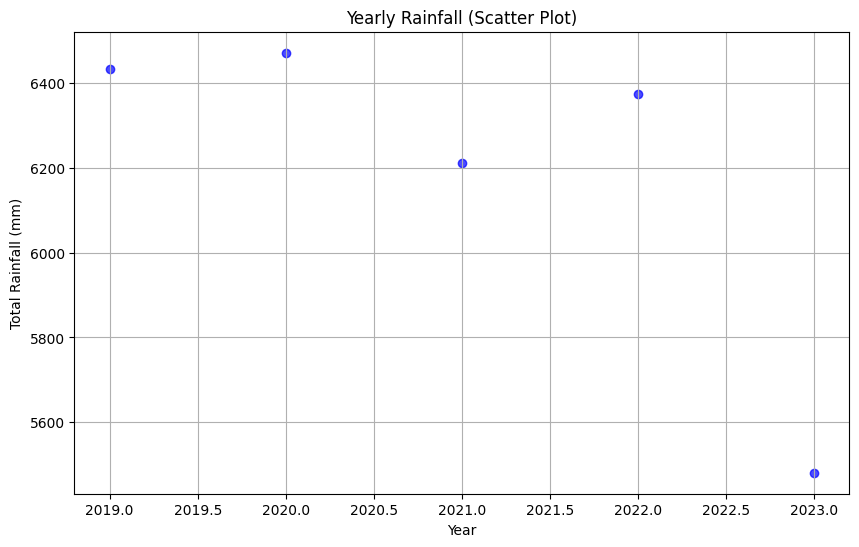

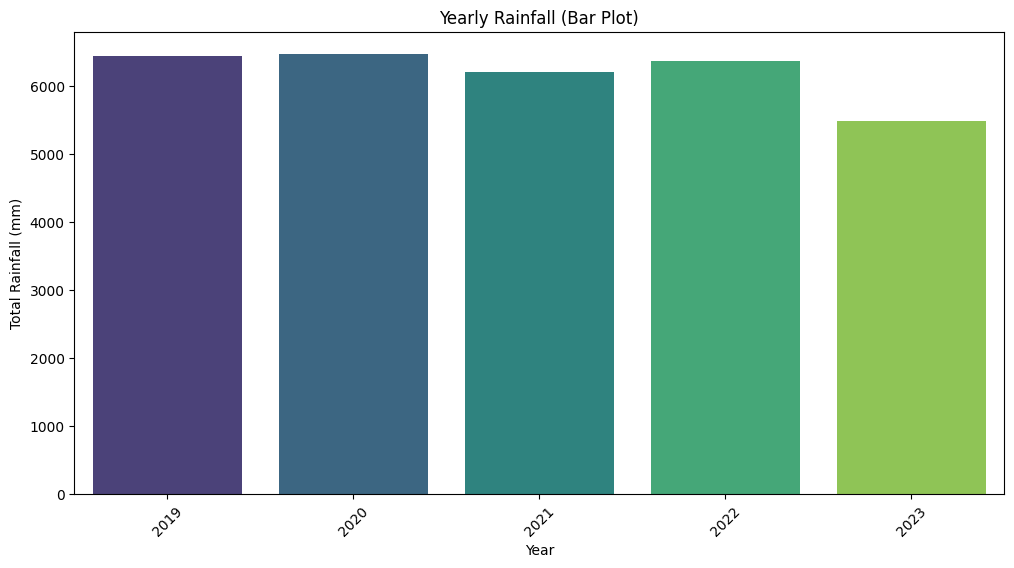

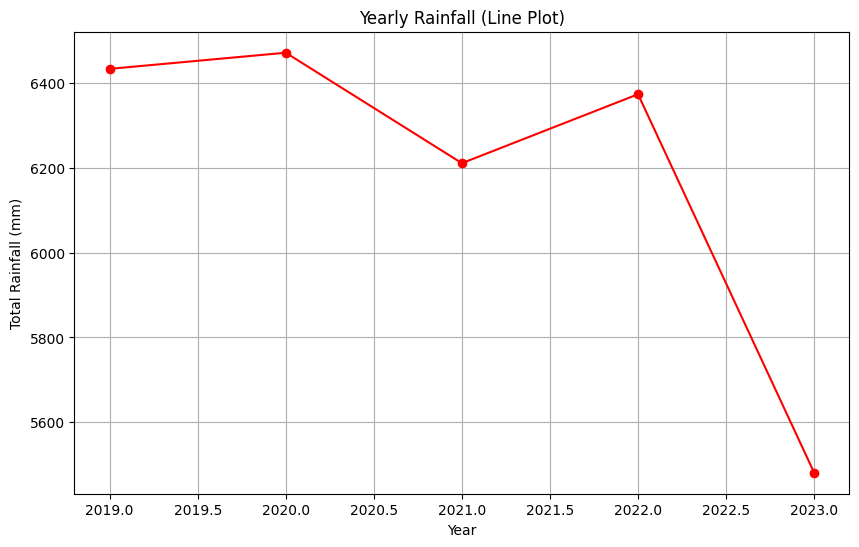

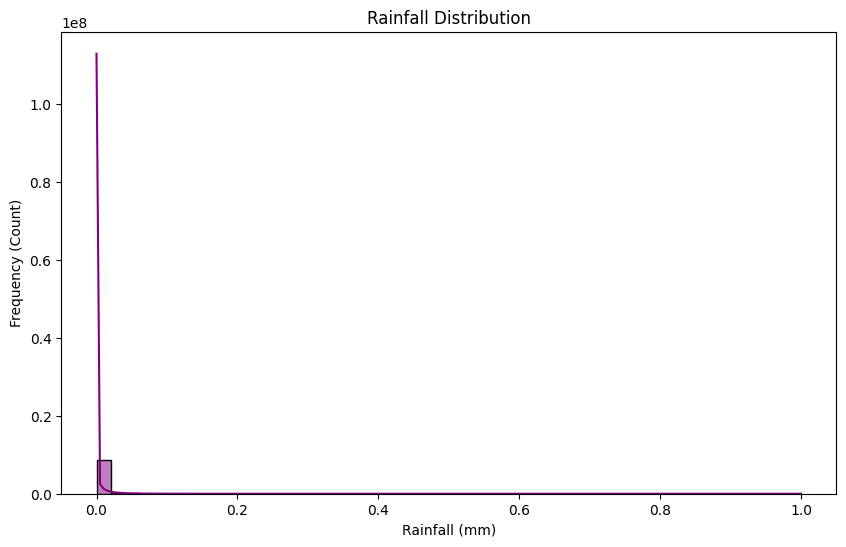

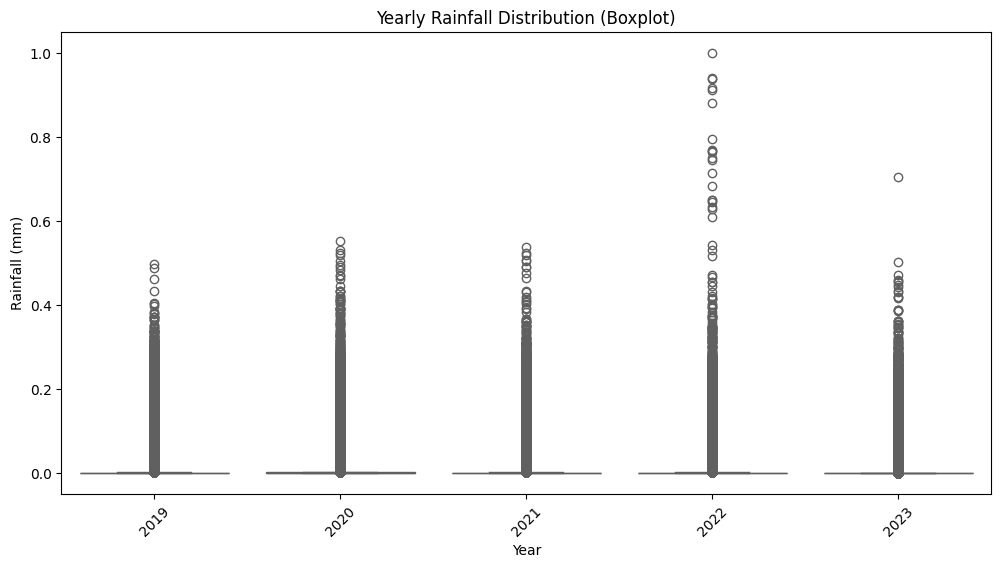

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'TIME' is in datetime format
data['TIME'] = pd.to_datetime(data['TIME'])

# Extract year from TIME
data['year'] = data['TIME'].dt.year

# Group data by year
yearly_rainfall = data.groupby('year')['RAINFALL'].sum().reset_index()

# Scatter Plot: Year vs Total Rainfall
plt.figure(figsize=(10, 6))
plt.scatter(yearly_rainfall['year'], yearly_rainfall['RAINFALL'], color='blue', alpha=0.7)
plt.title('Yearly Rainfall (Scatter Plot)')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (mm)')
plt.grid()
plt.show()

# Bar Plot: Year vs Total Rainfall
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='RAINFALL', data=yearly_rainfall, palette='viridis')
plt.title('Yearly Rainfall (Bar Plot)')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (mm)')
plt.xticks(rotation=45)
plt.show()

# Line Plot: Year vs Total Rainfall
plt.figure(figsize=(10, 6))
plt.plot(yearly_rainfall['year'], yearly_rainfall['RAINFALL'], marker='o', color='red', linestyle='-')
plt.title('Yearly Rainfall (Line Plot)')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (mm)')
plt.grid()
plt.show()

# Distribution Plot: Rainfall Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['RAINFALL'], bins=50, kde=True, color='purple')
plt.title('Rainfall Distribution')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency (Count)')
plt.show()

# Boxplot: Rainfall by Year
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='RAINFALL', data=data, palette='coolwarm')
plt.title('Yearly Rainfall Distribution (Boxplot)')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.xticks(rotation=45)
plt.show()